## **PROYECTO FINAL BOOTCAMP IA:**

### **Sebastián Carrero Cardona**

## **CONTEXTO:**

La clasificación de residuos es un proceso importante en la gestión y el reciclaje de residuos. Tradicionalmente, esta tarea se ha realizado de forma manual por parte de los trabajadores encargados de separar los diferentes tipos de residuos. Sin embargo, con los avances en el campo del aprendizaje automático, es posible desarrollar modelos que automatizan este proceso.

Los modelos de clasificación de residuos basados en aprendizaje automático utilizan algoritmos y técnicas para analizar imágenes o características específicas de los residuos y determinar su categoría o tipo. Esto se puede lograr utilizando diferentes enfoques, pero uno de los más comunes es el uso de redes neuronales convolucionales (CNN).

Las redes neuronales convolucionales son un tipo de arquitectura de aprendizaje profundo especialmente diseñada para procesar datos de imagen. Estas redes son capaces de aprender automáticamente características y patrones relevantes en las imágenes a partir de grandes conjuntos de datos de entrenamiento.

El proceso de desarrollo de un modelo de clasificación de residuos implica varias etapas. En primer lugar, se recopilan y etiquetan imágenes representativas de los diferentes tipos de residuos que se desean clasificar. Estas imágenes se utilizan para entrenar el modelo, donde la red neuronal convolucional aprende a reconocer las características distintivas de cada tipo de residuo.

Una vez que el modelo ha sido entrenado, se puede evaluar su rendimiento utilizando un conjunto separado de datos de prueba. La precisión y eficacia del modelo dependerán en gran medida de la calidad y diversidad de los datos de entrenamiento, así como de la arquitectura y los parámetros del modelo.

Además de las imágenes, también se pueden utilizar otras características, como datos espectrales o características físicas, para mejorar la precisión de la clasificación de residuos. Por ejemplo, en el caso de residuos reciclables, se pueden utilizar datos como el tipo de material, el peso o el tamaño para mejorar la precisión del modelo.

Los modelos de clasificación de residuos basados en aprendizaje automático ofrecen varias ventajas, como una mayor eficiencia y precisión en la clasificación, la automatización del proceso de separación de residuos y la capacidad de adaptarse a diferentes tipos de residuos. Esto puede tener un impacto significativo en la gestión de residuos y el reciclaje, mejorando la eficiencia y reduciendo los costos asociados.

## **COMPRENSIÓN DEL NEGOCIO:**

**Objetivo:** Clasificar imágenes de desechos como orgánico o reciclaje para su correcta gestión.

**Beneficio:** Facilitar la separación automática de residuos para mejorar el reciclaje y reducir la contaminación.


## **COMPRENSIÓN DE LOS DATOS:**

**Estructura del dataset:** se tienen dos carpetas principales **train**, la cual contiene las imagenes de entrenamiento de la red nueronal, y **test**, contiene las imagenes para evaluar al modelo, cada una de estas carpetas principales contienen dos subcarpetas para cada clase (orgánico y reciclaje).

**Volumen y diversidad de datos:** en el set de entrenamiento se cuenta con 12.565 imagenes etiquetadas como organicas y 9.999 etiquetadas como reciclaje, para un total de imagenes de entrenamiento de 22.564; por otra parte, el set de prueba contiene 1.401 imagenes etiquetadas como organicas y 1.112 etiquetadas como reciclaje para un total de 2.513 imagenes de prueba.

## **PREPARACIÓN DE LOS DATOS:**

- ### **Importación de librerías:**

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import glob

from skimage.io import imread, imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.feature_extraction.image import extract_patches_2d
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.io import imread
import random

import os
from PIL import Image
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn.cluster import MiniBatchKMeans
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.io import imread

from sklearn.metrics import silhouette_samples

- ### **Descripción del dataset:**

In [2]:
#Residuos organicos
train_O = glob.glob('C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/*.jpg')

#Total imagenes de entramiento organicos
print('Número muestras de entrenamiento organicas: {}'.format(len(train_O)))


Número muestras de entrenamiento organicas: 12565


In [3]:
#Residuos Reciclables
train_r = glob.glob('C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/*.jpg')

#Total imagenes de entramiento reciclaje
print('Número muestras de entrenamiento reciclaje: {}'.format(len(train_r)))

Número muestras de entrenamiento reciclaje: 9999


In [4]:
#Total imagenes de entramiento
print('Número muestras de entrenamiento total: {}'.format(len(train_O) + len(train_r)) )

Número muestras de entrenamiento total: 22564


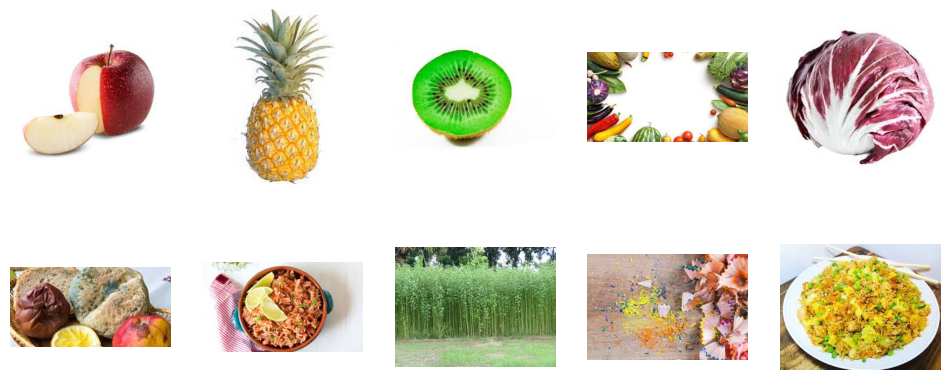

In [7]:
#Muestra aleatoria de imagenes de tipo organico:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_100.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_1010.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_11783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_8583.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/O/O_12000.jpg")
plt.imshow(img)

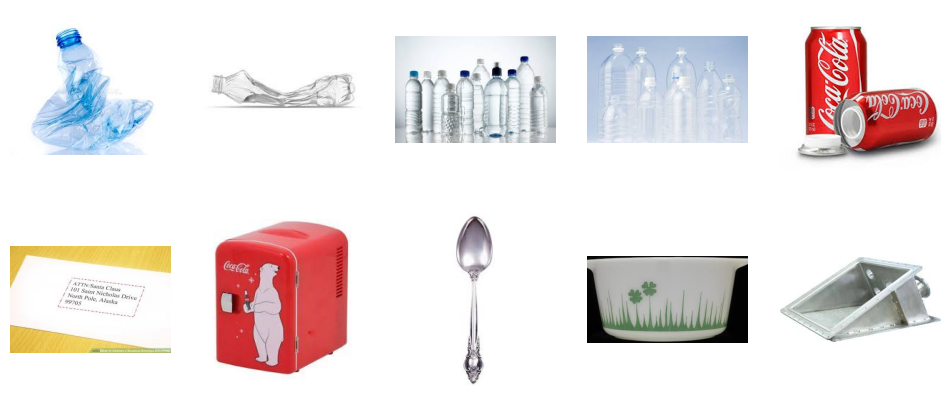

In [13]:
#Muestra aleatoria de imagenes de tipo reciclaje:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_950.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_1783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_8480.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_9030.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN/R/R_5000.jpg")
plt.imshow(img)

## **PREPROCESAMIENTO DE LOS DATOS:**

In [ ]:
## Aumentación y normalización para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0, #Reescala los valores de los píxeles de las imágenes para normalizarlos en un rango de [0, 1]
    zoom_range=0.2, #Aplica un zoom aleatorio a las imágenes, ayuda al modelo a reconocer objetos en diferentes escalas.
    rotation_range=5, #Rota aleatoriamente un máx de 5° en ambas direcciones, ayuda a que el modelo aprenda a reconocer los objetos aunque estén ligeramente girados
    width_shift_range=0.1,#Desplaza horizontalmente hasta un 10% de su ancho. Permite que el modelo aprenda a identificar los objetos aunque estén ligeramente desplazados
    height_shift_range=0.1, #Desplaza la imagen verticalmente hasta un 10% de su altura, ayuda al modelo a aprender patrones de imágenes que no están perfectamente centradas
    horizontal_flip=True, #Invierte aleatoriamente la imagen de izquierda a derecha, útil cuando los objetos en la imagen son simétricos y pueden aparecer en diferentes orientaciones horizontales.
    vertical_flip=False, #Especifica que no se aplicará el volteo vertical
    validation_split=0.2 #Divide el conjunto de imágenes en una proporción de 80% para entrenamiento y 20% para validación
)

# Normalización para el conjunto de validación
valid_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    horizontal_flip=True,
    rotation_range=5,
    validation_split=0.2
)

# Normalización para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


In [8]:
# Cargar los datos de entrenamiento

#flow_from_directory lee automaticamente la estructura de las carpetas ppales,
#las subcarpetas al interior de estas ppales se consideran clases y se etiquetaran de forma binaria automaticamente por su orden alfabetico
#Organica(O) = 0 y reciclaje (R) = 1  


train_dataset = train_datagen.flow_from_directory(
    directory='C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN',
    target_size=(224, 224), #Redimensiona todas la imagenes para el modelo trabaje con un tamaño uniforme
    class_mode='binary', #Define el tipo de clasificación
    batch_size=64, #Carga y procesa las imagenes en lotes de 64, para reducir la carga de la memoria y facilitar el entrenamiento
    subset='training' #Especifica el subconjunto a utilizar
)

# Cargar los datos de validación
validation_dataset = valid_datagen.flow_from_directory(
    directory='C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TRAIN',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=64,
    subset='validation'
)

# Cargar los datos de prueba
test_dataset = test_datagen.flow_from_directory(
    directory='C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TEST',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=64
)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


## **MODELADO**

- ### **Parametrización del modelo**

In [9]:
model = tf.keras.models.Sequential([
    # Entrada de imagne 224X224 con 3 colores
    tf.keras.layers.Conv2D(filters=32,activation='relu',input_shape=(224,224,3),padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=32,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # aplana los resultados introducidos con una DNN
    tf.keras.layers.Flatten(),
    # Capa oculta con 512 neuronas
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    #  Capa oculta con 256 neuronas
    tf.keras.layers.Dense(units=256,activation='relu'),
    # Solo 1 neurona de salida. Contendrá un valor de 0 a 1, donde 0 para una clase ('Orgánica')
    # y 1 para la otra ('Reciclada')
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [10]:
#Resumen del modelo:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,799,329 (197.60 MB)

 Trainable params: 51,799,329 (197.60 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

# Definir callbacks
monitor = EarlyStopping(
    monitor='val_auc',
    patience=3,  # Incrementé la paciencia para mayor flexibilidad
    verbose=1,
    mode='max',
    restore_best_weights=True
)

filepath = './best_model.keras'  # Guarda el mejor modelo
checkpoint = ModelCheckpoint(
    filepath,
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

callback_list = [monitor, checkpoint]

# Compilación del modelo
model.compile(
    optimizer=RMSprop(learning_rate=0.001),  # Usar 'learning_rate' para versiones recientes
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)



- ### **Entrenamiento**

In [15]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=15,
                              verbose=1, callbacks=callback_list)


Epoch 1/15
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.6557 - loss: 0.8794
Epoch 1: val_auc improved from -inf to 0.87530, saving model to ./best_model.keras
283/283 ━━━━━━━━━━━━━━━━━━━━ 1043s 4s/step - auc: 0.6561 - loss: 0.8785 - val_auc: 0.8753 - val_loss: 0.4681
Epoch 2/15
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.8631 - loss: 0.4661
Epoch 2: val_auc improved from 0.87530 to 0.89737, saving model to ./best_model.keras
283/283 ━━━━━━━━━━━━━━━━━━━━ 1040s 4s/step - auc: 0.8631 - loss: 0.4661 - val_auc: 0.8974 - val_loss: 0.4215
Epoch 3/15
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.8845 - loss: 0.4241
Epoch 3: val_auc did not improve from 0.89737
283/283 ━━━━━━━━━━━━━━━━━━━━ 996s 4s/step - auc: 0.8845 - loss: 0.4241 - val_auc: 0.8847 - val_loss: 0.4721
Epoch 4/15
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - auc: 0.9020 - loss: 0.3968
Epoch 4: val_auc improved from 0.89737 to 0.91752, saving model to ./best_model.keras
283/283 ━━━━━━━━━━━━━━━━━━━━ 1021s 4s/step - auc: 0.9

- ### **Evaluación**

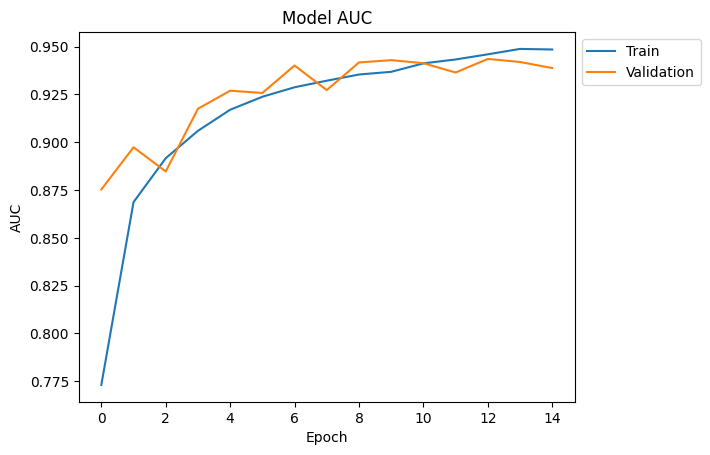

In [16]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

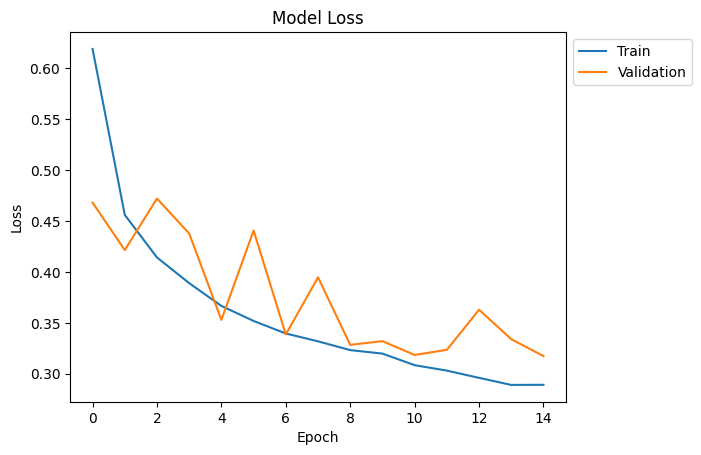

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [18]:
#Evaluación de pérdida y AUC para datos de prueba
model.evaluate(test_dataset)

40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 686ms/step - auc: 0.9504 - loss: 0.3662


[0.3627818822860718, 0.9511121511459351]

**Análisis e Interpretación**

Pérdida (Loss): 0.3662
Área Bajo la Curva (AUC): 0.9504


Pérdida (Loss):
La métrica de pérdida refleja qué tan bien el modelo predice los datos del conjunto de prueba según la función de pérdida definida durante el entrenamiento. En este caso, una pérdida de 0.3662 indica que el modelo tiene un desempeño aceptable, el cual se debe explorar otras parametrizaciones para mejorar.

Área Bajo la Curva (AUC):
El AUC mide la capacidad del modelo para distinguir entre las clases. Un valor de 0.9504 (95.04%) indica que el modelo es altamente efectivo al clasificar correctamente las muestras, demostrando capacidad para diferenciar entre las clases Organica y Reciclaje.

**Conclusión:**

El modelo demuestra un buen desempeño en términos de clasificación, como lo evidencia el alto valor de AUC. Sin embargo, la métrica de pérdida sugiere que hay oportunidad para optimizar el modelo, lo que podría implicar ajustes adicionales como:

Refinar los hiperparámetros del modelo.
Incrementar la calidad de los datos de entrenamiento.

Con base en los resultados obtenidos, se considera que el modelo es adecuado para la tarea de clasificación, aunque existen áreas de mejora que podrían explorarse en futuras iteraciones.

Found 2513 images belonging to 2 classes.
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 618ms/step


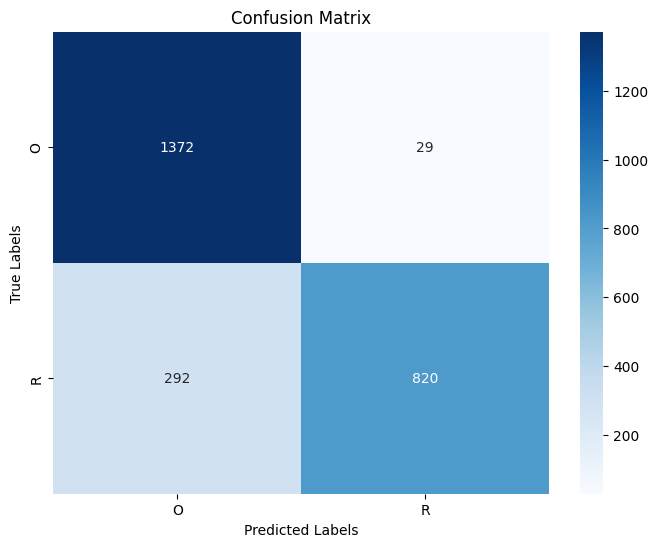

              precision    recall  f1-score   support

           O       0.82      0.98      0.90      1401
           R       0.97      0.74      0.84      1112

    accuracy                           0.87      2513
   macro avg       0.90      0.86      0.87      2513
weighted avg       0.89      0.87      0.87      2513



In [ ]:
#Evaluación con matriz de confusión
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el modelo entrenado
model = load_model('C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/notebooks/best_model.keras')

# 2. Cargar el conjunto de prueba

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_dataset = test_datagen.flow_from_directory(
    directory='C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/TEST',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=64,
    shuffle=False 
)

# 3. Obtener predicciones del modelo
y_pred = model.predict(test_dataset)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()  # Convertir probabilidades a clases binarias
y_true = test_dataset.classes  # Etiquetas verdaderas

# 4. Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(test_dataset.class_indices.keys())  # Nombres de las clases

# 5. Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 6. Mostrar reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))


El resultado de la matriz de confusión y las métricas de clasificación muestran el desempeño del modelo en las dos clases: Orgánico (O) y Reciclable (R):

**1- Métricas por clase:**

**1.1. Clase Orgánico (O):**

**Precisión (Precision): 0.82**
Indica que el 82% de las imágenes clasificadas como "Orgánico" son realmente "Orgánico". La precisión es moderada, lo que sugiere que hay algunas imágenes clasificadas incorrectamente como "Orgánico".

**Recall (Sensibilidad): 0.98**
El 98% de las imágenes que realmente son "Orgánico" fueron correctamente clasificadas. Esto indica que el modelo casi no omite imágenes "Orgánico".

**F1-Score: 0.90**
Combina precisión y recall en un único indicador. La clase "Orgánico" tiene un buen equilibrio entre ambas métricas.

**1.2. Clase Reciclable (R):**

**Precisión: 0.97**
El 97% de las imágenes clasificadas como "Reciclable" son realmente "Reciclable". Esto indica que el modelo tiene una baja tasa de falsos positivos para esta clase.

**Recall: 0.74**
El 74% de las imágenes que realmente son "Reciclable" fueron correctamente clasificadas. Esto sugiere que el modelo está omitiendo más imágenes "Reciclable" de las que debería.

**F1-Score: 0.84**
Indica un desempeño aceptable para esta clase, pero no tan bueno como para "Orgánico". Métricas generales:

**2- Métricas Generales**

**2.1. Exactitud (Accuracy): 0.87**
El modelo clasifica correctamente el 87% de todas las imágenes. Esto refleja un desempeño sólido, aunque hay margen de mejora.

**2.2. Promedio macro (Macro Avg):**
**Precisión (Precision): 0.90**
**Recall: 0.86**
**F1-Score: 0.87**
Promedia los valores de precisión, recall y F1-score de ambas clases sin ponderarlas por el número de muestras. Muestra que el modelo tiene un desempeño ligeramente mejor en "Orgánico" que en "Reciclable".


**2.3. Promedio ponderado (Weighted Avg):**

**Precisión (Precision): 0.89**
**Recall: 0.87**
**F1-Score: 0.87**
Toma en cuenta el número de muestras por clase, reflejando mejor el desempeño global del modelo considerando la cantidad de datos de cada clase.

**Conclusiones:**
El modelo es muy bueno detectando imágenes de la clase "Orgánico" (alto recall) pero tiene dificultades para identificar todas las imágenes de la clase "Reciclable" (recall bajo). El balance entre precisión y recall en "Reciclable" podría mejorarse para aumentar el F1-score. La alta precisión en "Reciclable" (0.97) indica que las imágenes predichas como reciclables son generalmente correctas, pero el modelo omite varias imágenes reciclables reales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
La imagen pertenece a la categoría Residuos orgánicos


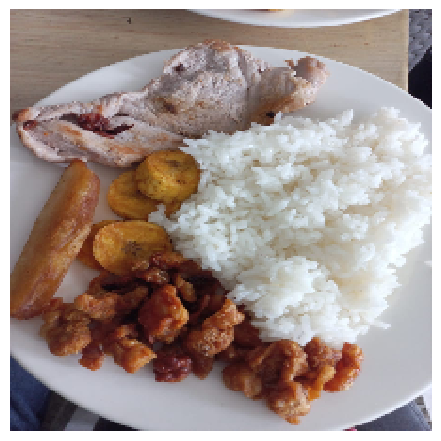

In [27]:
# prueba con datos diferentes a los de entrenamiento

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/VALIDATION/R_2000.jpeg", target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("La imagen pertenece a la categoría Residuos reciclados")
else:
    print("La imagen pertenece a la categoría Residuos orgánicos")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
La imagen pertenece a la categoría Residuos reciclados


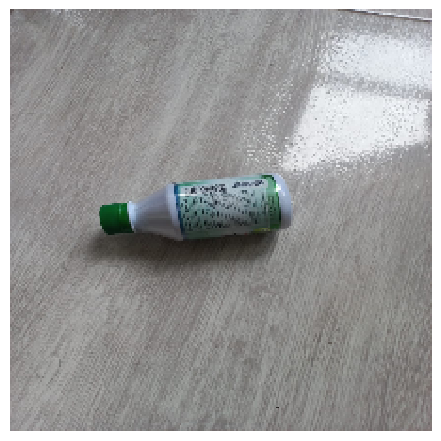

In [28]:
# prueba con datos diferentes a los de entrenamiento

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/VALIDATION/R_3000.jpeg", target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("La imagen pertenece a la categoría Residuos reciclados")
else:
    print("La imagen pertenece a la categoría Residuos orgánicos")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
La imagen pertenece a la categoría Residuos reciclados


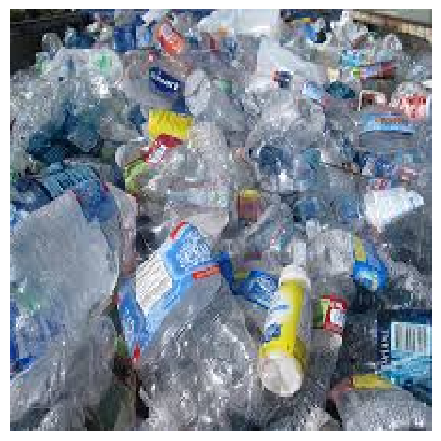

In [23]:
# prueba con datos diferentes a los de entrenamiento

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/VALIDATION/R_817.jpg", target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("La imagen pertenece a la categoría Residuos reciclados")
else:
    print("La imagen pertenece a la categoría Residuos orgánicos")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
La imagen pertenece a la categoría Residuos orgánicos


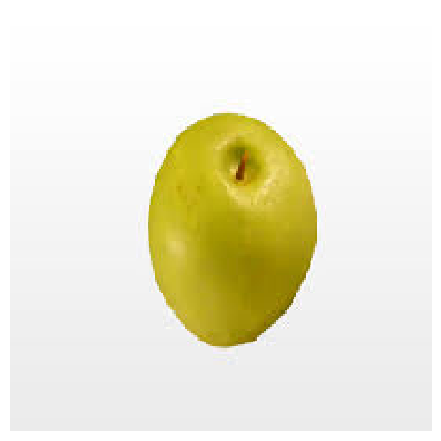

In [24]:
# prueba con datos diferentes a los de entrenamiento

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img("C:/SEBASTIAN/BOOTCAMP IA/PROYECTO_FINAL_RED_NEURONAL_CNN/data/raw/VALIDATION/O_37.jpg", target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("La imagen pertenece a la categoría Residuos reciclados")
else:
    print("La imagen pertenece a la categoría Residuos orgánicos")